In [1]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from utils import REF_NET as reference_net
from utils import highlight_edges
from utils import POS
from utils import plot_predicted_vs_actual
from sklearn.metrics import mutual_info_score

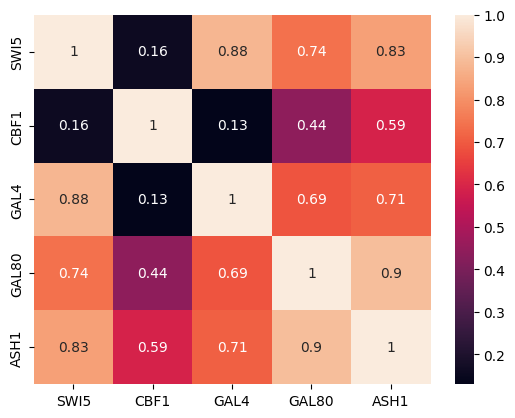

In [ ]:
data = pd.read_csv('data.csv')
factors = data.drop(columns=['time'])
corrs = np.corrcoef(factors, rowvar=False)
# Print values inside the heatmap

sns.heatmap(corrs, xticklabels=factors.columns, yticklabels=factors.columns, annot=True)

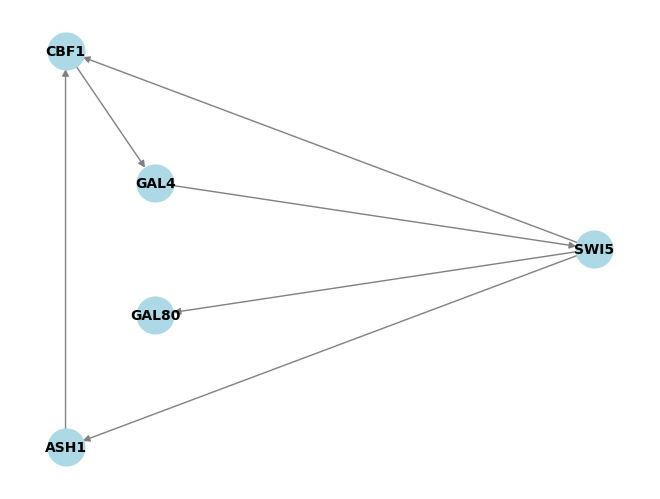

In [3]:
pos = nx.spring_layout(reference_net)
nx.draw(reference_net, POS, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.show()

Threshold: 0.4
[('SWI5', 'GAL4'), ('SWI5', 'GAL80'), ('SWI5', 'ASH1'), ('GAL4', 'GAL80'), ('GAL4', 'ASH1'), ('GAL80', 'CBF1'), ('GAL80', 'ASH1'), ('ASH1', 'CBF1')]
True Positives: 	4 
False Negatives: 	2 
False Positives: 	5 
Precision: 		0.44 
Recall: 		0.67 
F1: 		0.53


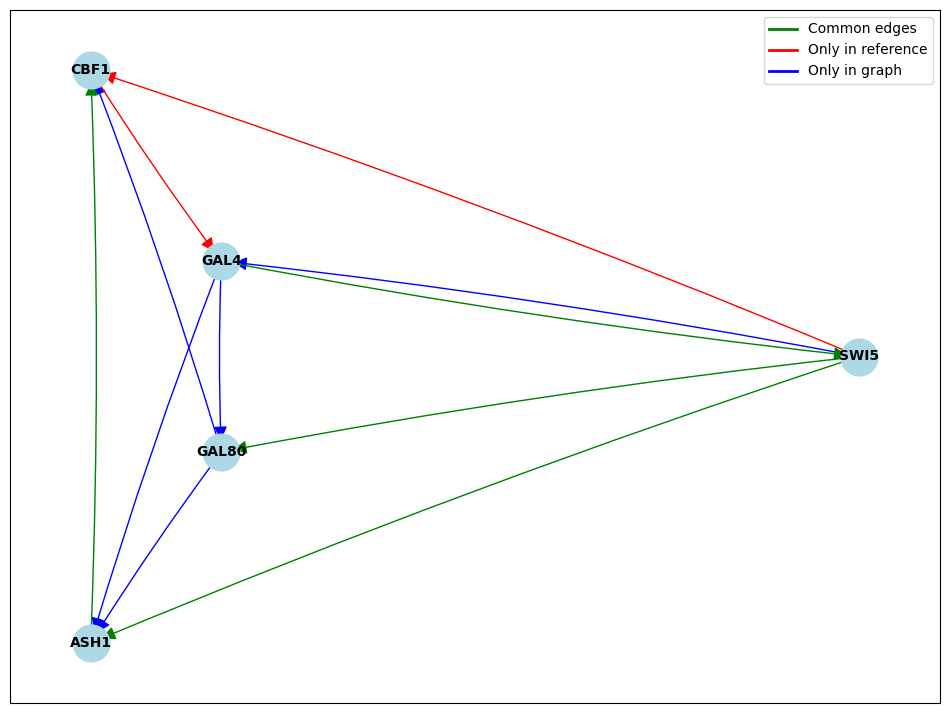

Threshold: 0.5
[('SWI5', 'GAL4'), ('SWI5', 'GAL80'), ('SWI5', 'ASH1'), ('GAL4', 'GAL80'), ('GAL4', 'ASH1'), ('GAL80', 'ASH1'), ('ASH1', 'CBF1')]
True Positives: 	4 
False Negatives: 	2 
False Positives: 	4 
Precision: 		0.50 
Recall: 		0.67 
F1: 		0.57


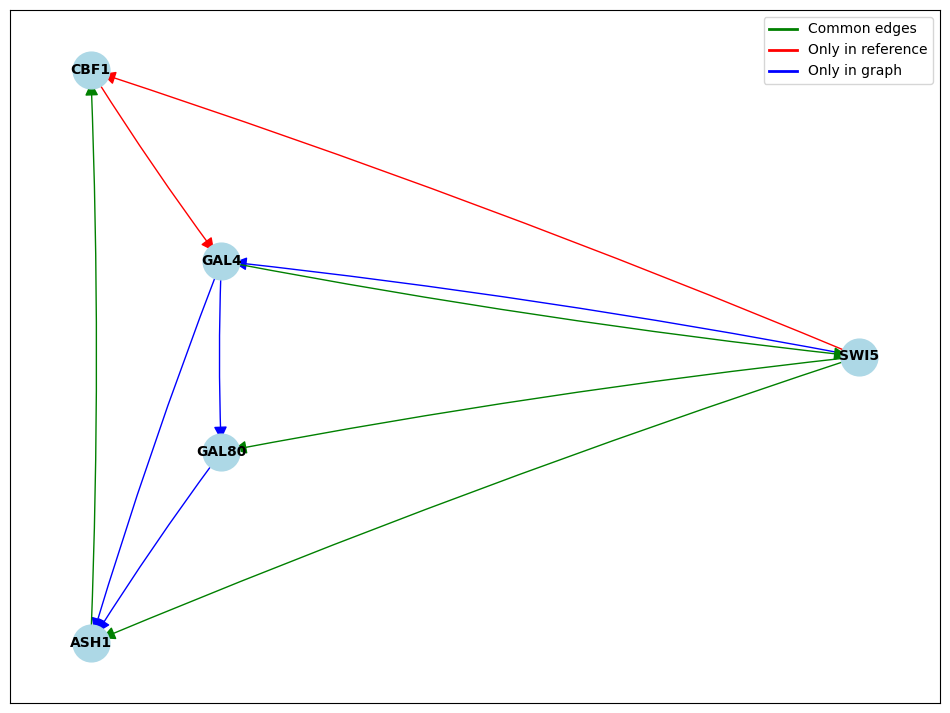

Threshold: 0.6000000000000001
[('SWI5', 'GAL4'), ('SWI5', 'GAL80'), ('SWI5', 'ASH1'), ('GAL4', 'GAL80'), ('GAL4', 'ASH1'), ('GAL80', 'ASH1')]
True Positives: 	3 
False Negatives: 	3 
False Positives: 	4 
Precision: 		0.43 
Recall: 		0.50 
F1: 		0.46


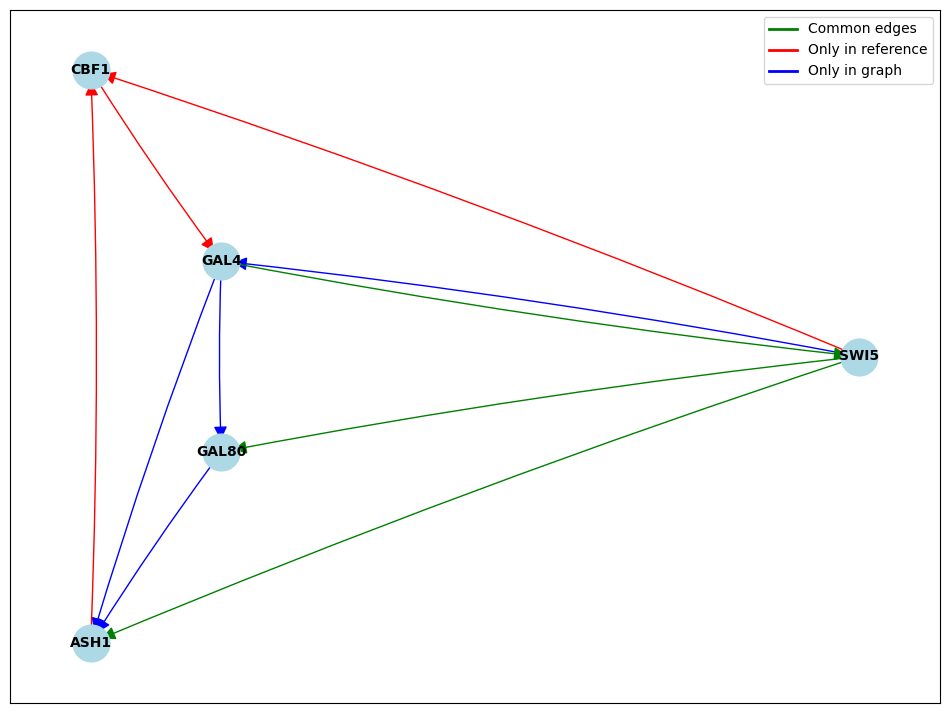

Threshold: 0.7000000000000001
[('SWI5', 'GAL4'), ('SWI5', 'GAL80'), ('SWI5', 'ASH1'), ('GAL4', 'ASH1'), ('GAL80', 'ASH1')]
True Positives: 	3 
False Negatives: 	3 
False Positives: 	3 
Precision: 		0.50 
Recall: 		0.50 
F1: 		0.50


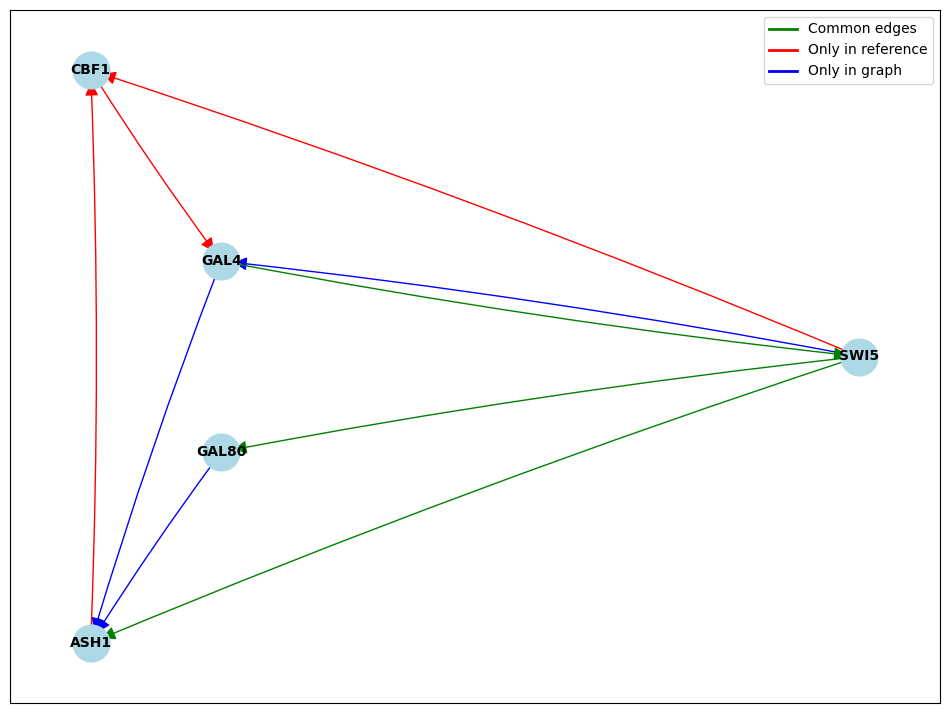

Threshold: 0.8
[('SWI5', 'GAL4'), ('SWI5', 'ASH1'), ('ASH1', 'GAL80')]
True Positives: 	2 
False Negatives: 	4 
False Positives: 	2 
Precision: 		0.50 
Recall: 		0.33 
F1: 		0.40


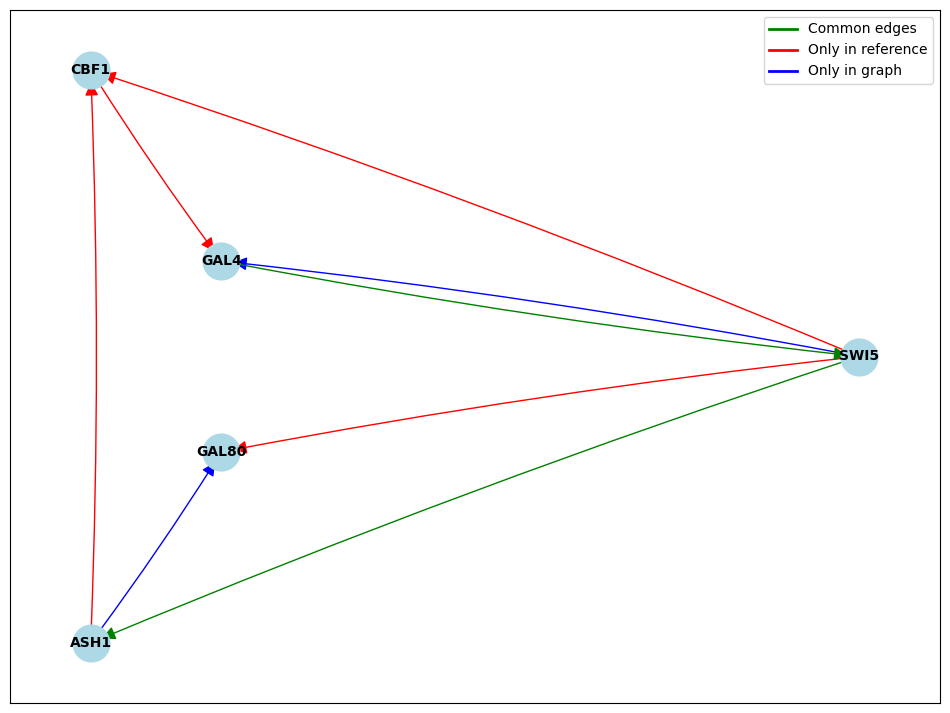

Threshold: 0.9
[]
True Positives: 	0 
False Negatives: 	6 
False Positives: 	0 
Precision: 		0.00 
Recall: 		0.00 
F1: 		0.00


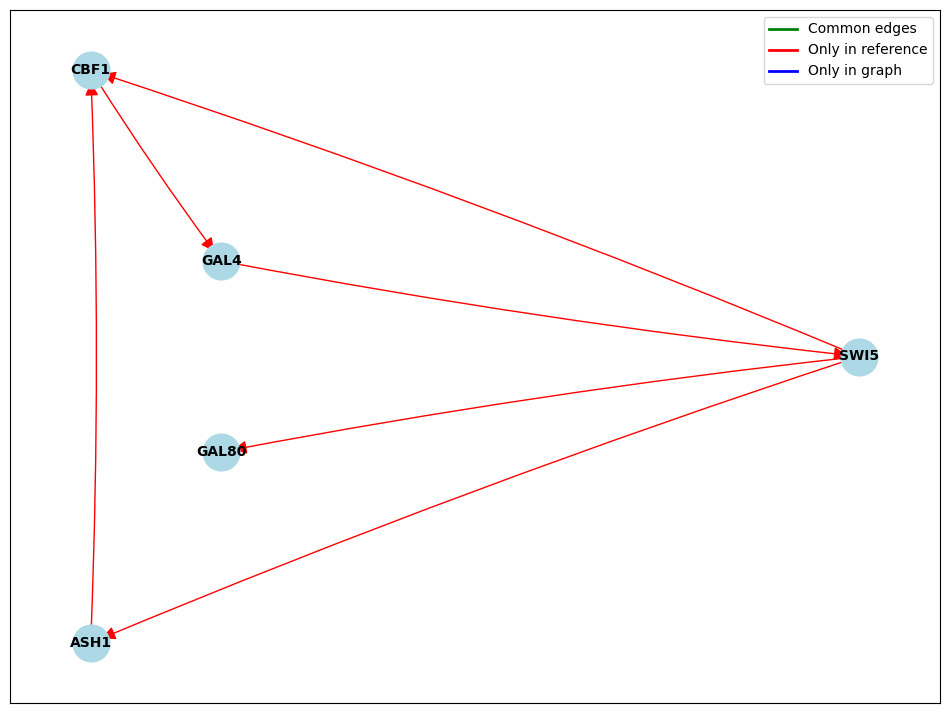

In [4]:
thresholds = np.linspace(0.4, 0.9, num=6)
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    edges = np.where(np.abs(corrs) >= threshold)
    edge_list = [(factors.columns[i], factors.columns[j], corrs[i, j]) for i, j in zip(*edges) if i != j and i < j]
    g = nx.Graph()
    g.add_weighted_edges_from(edge_list)
    # Plot the network
    print(g.edges)
    highlight_edges(g, reference_net)

In [5]:
factors_discretized = factors.copy()
for col in factors_discretized.columns:
    factors_discretized[col] = pd.qcut(factors_discretized[col], q=6, labels=False, duplicates='drop')

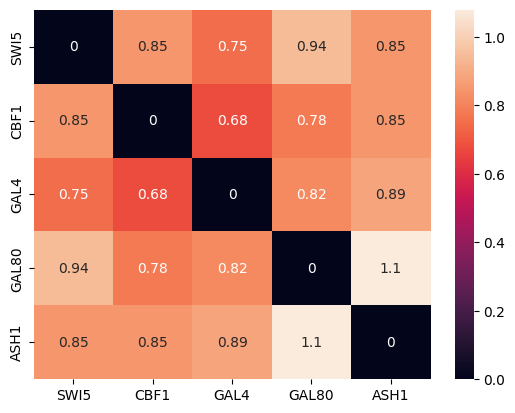

In [50]:
mi_matrix = pd.DataFrame(index=factors.columns, columns=factors.columns)

for i in factors.columns:
    for j in factors.columns:
        if i != j:
            # mi = mutual_info_regression(factors[[i]], factors[j])
            # mi_matrix.loc[i, j] = mi[0]
            mi = mutual_info_score(factors_discretized[i], factors_discretized[j])
            mi_matrix.loc[i, j] = mi
        else:
            mi_matrix.loc[i, j] = 0
sns.heatmap(mi_matrix.astype(float), xticklabels=factors.columns, yticklabels=factors.columns, annot=True)
plt.savefig('mi_heatmap.png')
plt.show()

Threshold: 0.6
True Positives: 	3 
False Negatives: 	3 
False Positives: 	3 
Precision: 		0.50 
Recall: 		0.50 
F1: 		0.50


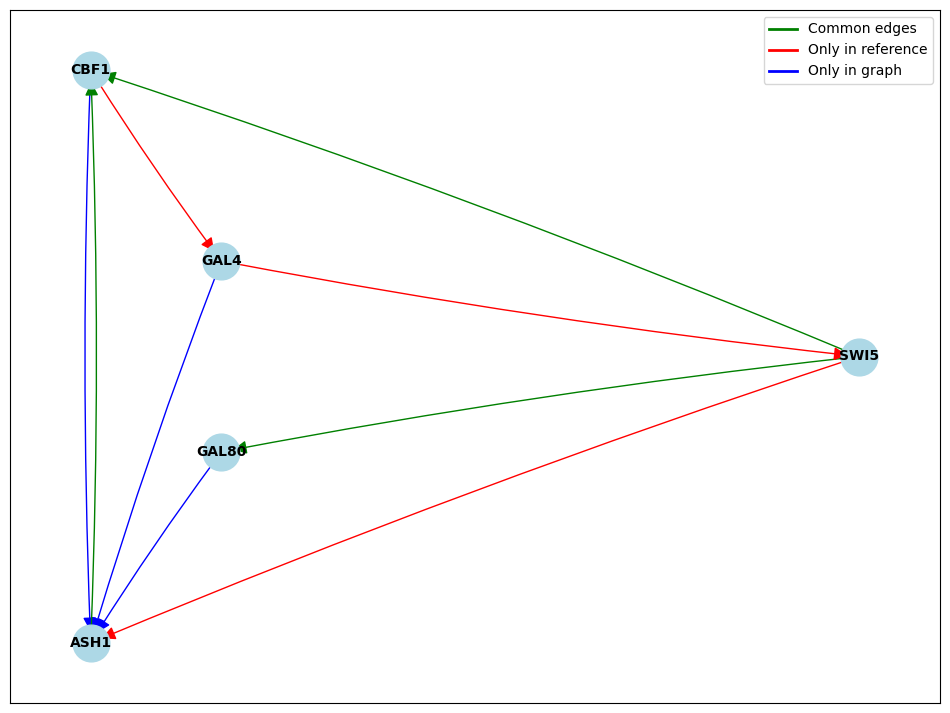

Threshold: 0.6833333333333333
True Positives: 	3 
False Negatives: 	3 
False Positives: 	3 
Precision: 		0.50 
Recall: 		0.50 
F1: 		0.50


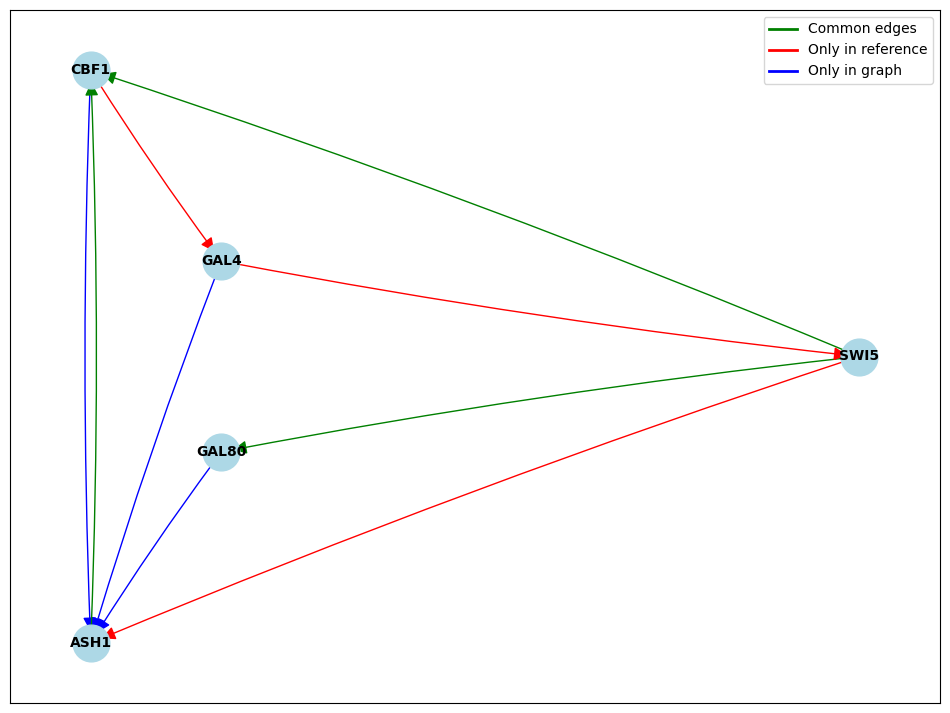

Threshold: 0.7666666666666667
True Positives: 	3 
False Negatives: 	3 
False Positives: 	3 
Precision: 		0.50 
Recall: 		0.50 
F1: 		0.50


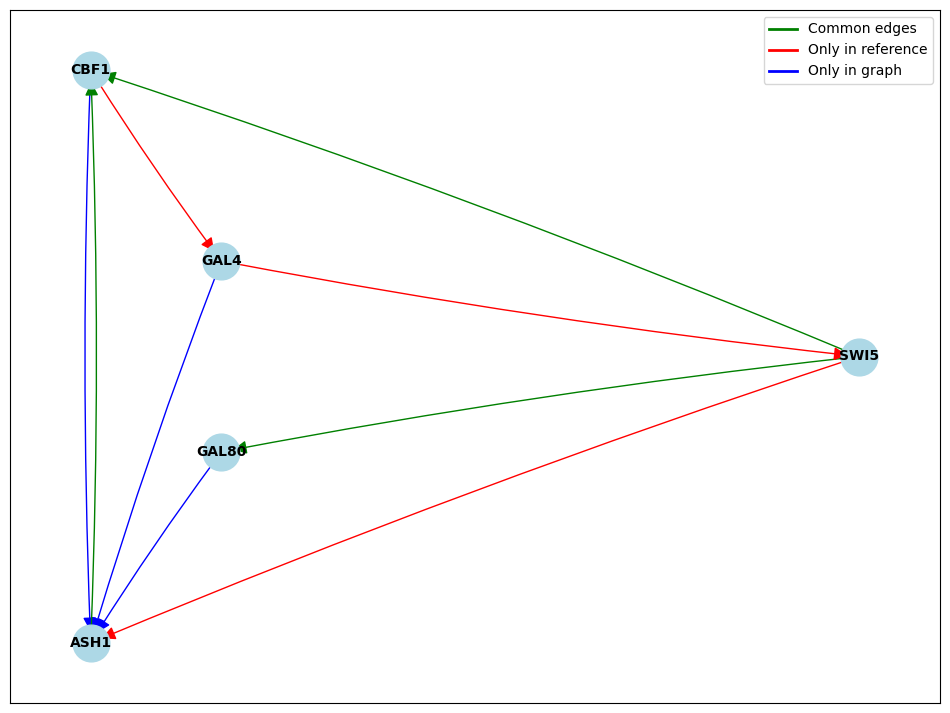

Threshold: 0.8500000000000001
True Positives: 	1 
False Negatives: 	5 
False Positives: 	2 
Precision: 		0.33 
Recall: 		0.17 
F1: 		0.22


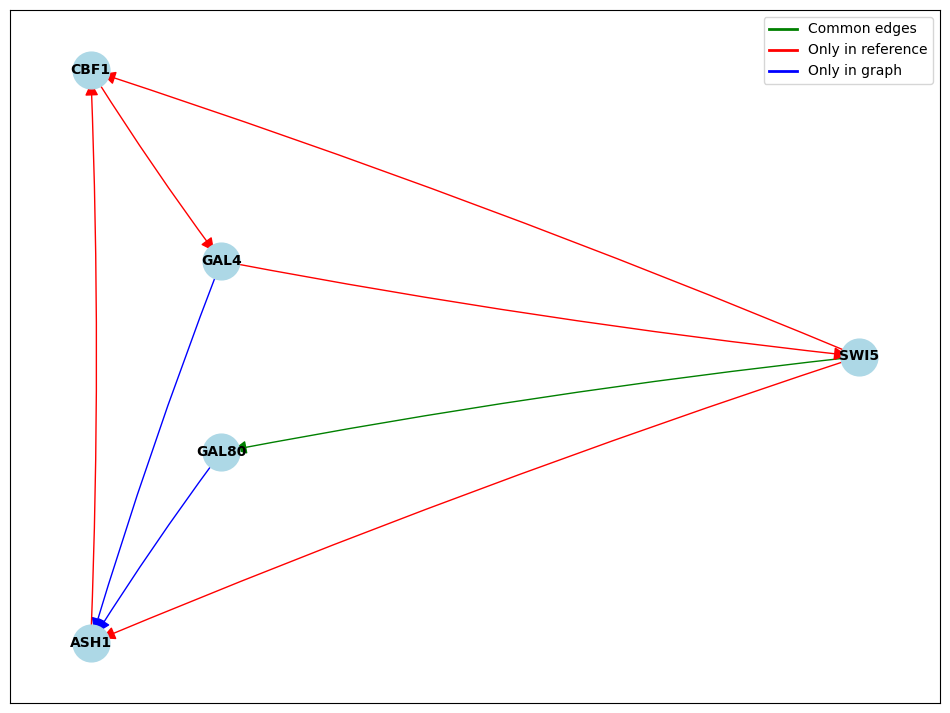

Threshold: 0.9333333333333333
True Positives: 	1 
False Negatives: 	5 
False Positives: 	1 
Precision: 		0.50 
Recall: 		0.17 
F1: 		0.25


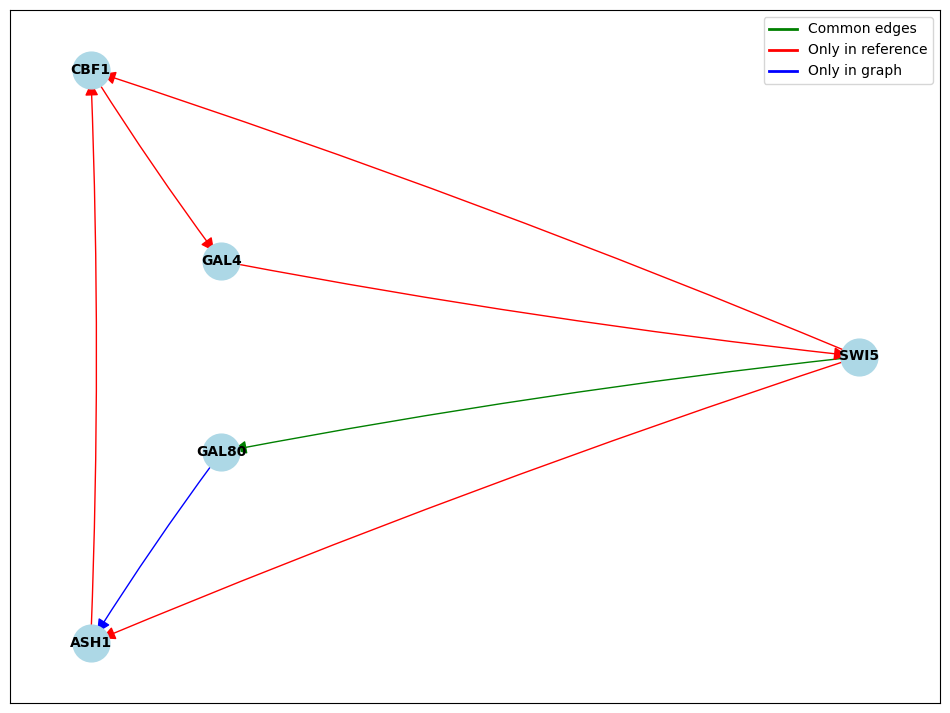

Threshold: 1.0166666666666668
True Positives: 	0 
False Negatives: 	6 
False Positives: 	1 
Precision: 		0.00 
Recall: 		0.00 
F1: 		0.00


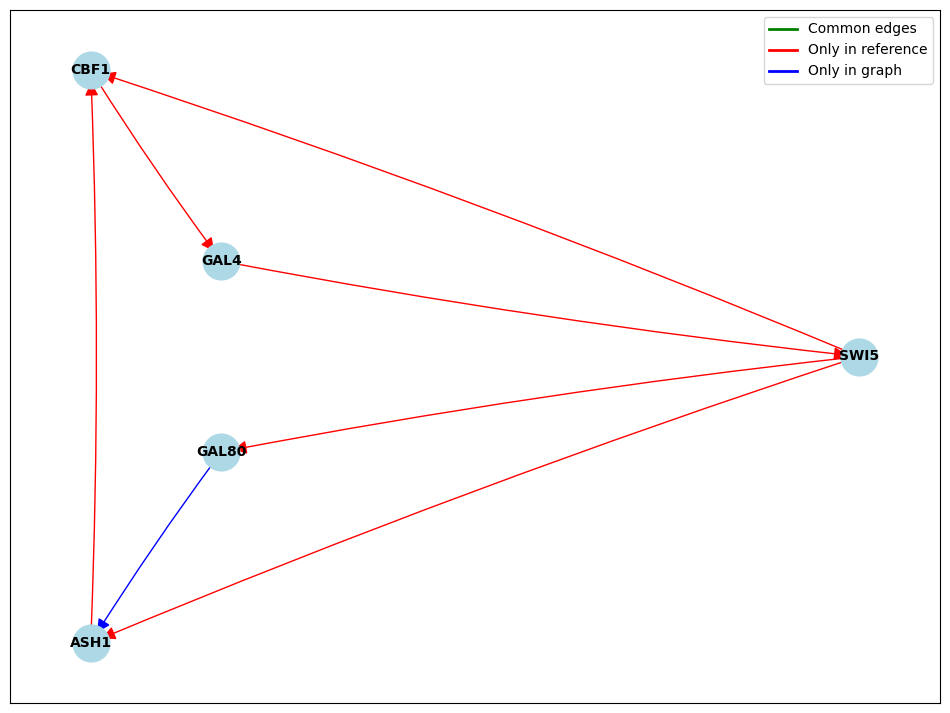

Threshold: 1.1
True Positives: 	0 
False Negatives: 	6 
False Positives: 	0 
Precision: 		0.00 
Recall: 		0.00 
F1: 		0.00


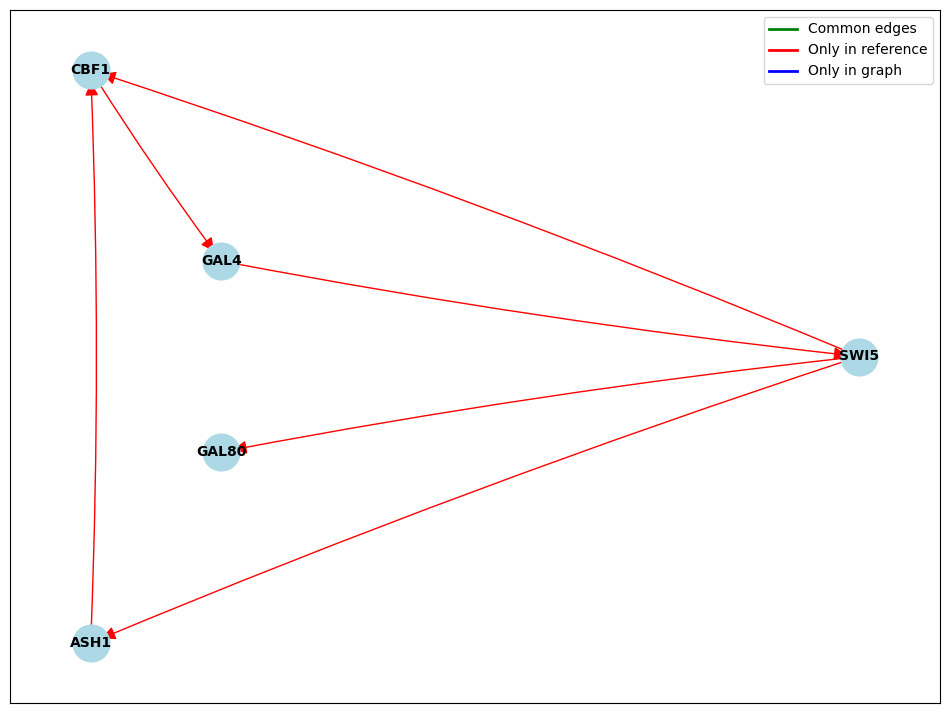

In [7]:
# Aracne algorithm
# thresholds = np.linspace(0.07, 0.4, num=7)
thresholds = np.linspace(0.6, 1.1, num=7)
for threshold in thresholds:
    print(f"Threshold: {threshold}")
    aracne_edges = []
    for i in factors.columns:
        for j in factors.columns:
            if i != j:
                mi_ij = mi_matrix.loc[i, j]
                if mi_ij >= threshold:
                    aracne_edges.append((i, j, mi_ij))
    for i in factors.columns:
        for j in factors.columns:
            for k in factors.columns:
                if i != j and i != k and j != k:
                    if (i, j, mi_matrix.loc[i, j]) in aracne_edges and (j, k, mi_matrix.loc[j, k]) in aracne_edges and (i, k, mi_matrix.loc[i, k]) in aracne_edges:
                        min_mi = min(mi_matrix.loc[i, j], mi_matrix.loc[j, k], mi_matrix.loc[i, k])
                        if mi_matrix.loc[i, j] == min_mi:
                            aracne_edges.remove((i, j, mi_matrix.loc[i, j]))
                        elif mi_matrix.loc[j, k] == min_mi:
                            aracne_edges.remove((j, k, mi_matrix.loc[j, k]))
                        else:
                            aracne_edges.remove((i, k, mi_matrix.loc[i, k]))
    aracne_net = nx.Graph()
    aracne_net.add_weighted_edges_from(aracne_edges)
    if threshold == 0.6:
        best_aracne_net = aracne_net
    highlight_edges(aracne_net, reference_net)

## Bayesian networks

In [52]:
from pgmpy.estimators import HillClimbSearch, LogLikelihoodGauss, BICGauss, AICGauss, ExhaustiveSearch

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'SWI5': 'N', 'CBF1': 'N', 'GAL4': 'N', 'GAL80': 'N', 'ASH1': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'SWI5': 'N', 'CBF1': 'N', 'GAL4': 'N', 'GAL80': 'N', 'ASH1': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'SWI5': 'N', 'CBF1': 'N', 'GAL4': 'N', 'GAL80': 'N', 'ASH1': 'N'}
  0%|          | 10/1000000 [00:00<7:05:35, 39.16it/s]


True Positives: 	2 
False Negatives: 	4 
False Positives: 	2 
Precision: 		0.50 
Recall: 		0.33 
F1: 		0.40


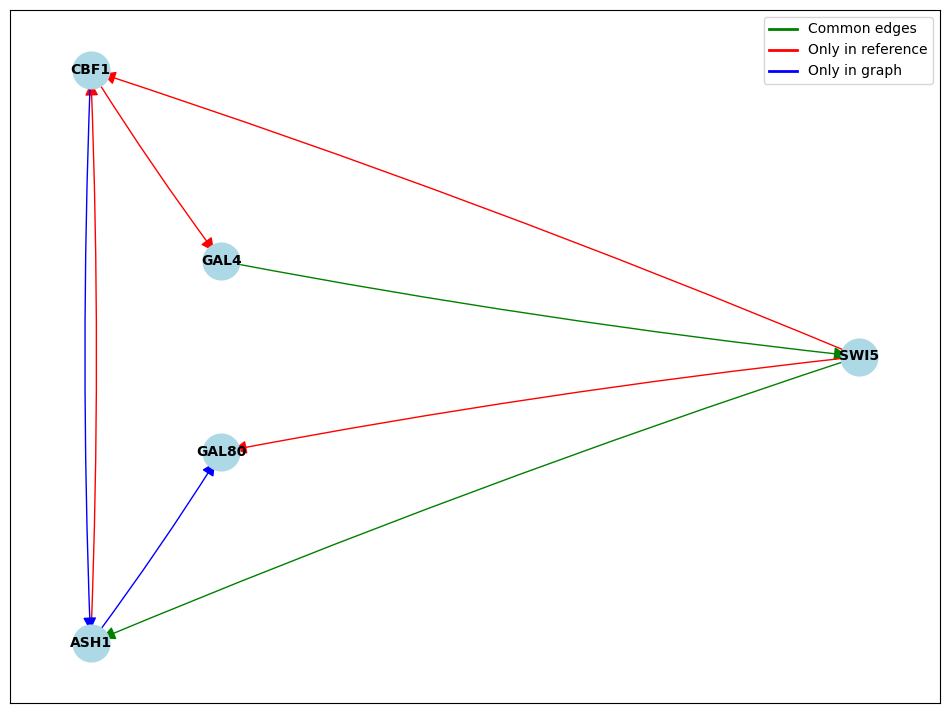

In [55]:
est = HillClimbSearch(factors)
model = est.estimate(scoring_method=LogLikelihoodGauss(factors))
net = nx.DiGraph()
net.add_edges_from(best_model.edges())
highlight_edges(net, reference_net)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'SWI5': 'N', 'CBF1': 'N', 'GAL4': 'N', 'GAL80': 'N', 'ASH1': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'SWI5': 'N', 'CBF1': 'N', 'GAL4': 'N', 'GAL80': 'N', 'ASH1': 'N'}
  0%|          | 4/1000000 [00:00<10:54:46, 25.45it/s]


True Positives: 	2 
False Negatives: 	4 
False Positives: 	2 
Precision: 		0.50 
Recall: 		0.33 
F1: 		0.40


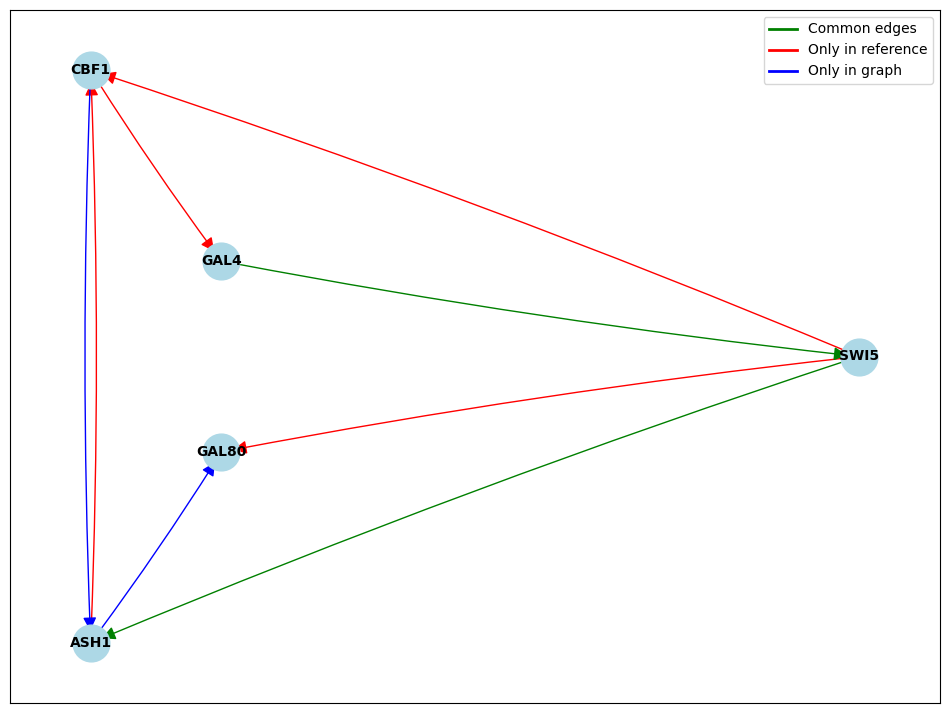

In [56]:
model = est.estimate(scoring_method=BICGauss(factors, ))
net = nx.DiGraph()
net.add_edges_from(model.edges())
highlight_edges(net, reference_net)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'SWI5': 'N', 'CBF1': 'N', 'GAL4': 'N', 'GAL80': 'N', 'ASH1': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'SWI5': 'N', 'CBF1': 'N', 'GAL4': 'N', 'GAL80': 'N', 'ASH1': 'N'}
  0%|          | 7/1000000 [00:00<8:09:02, 34.08it/s] 


True Positives: 	5 
False Negatives: 	1 
False Positives: 	2 
Precision: 		0.71 
Recall: 		0.83 
F1: 		0.77


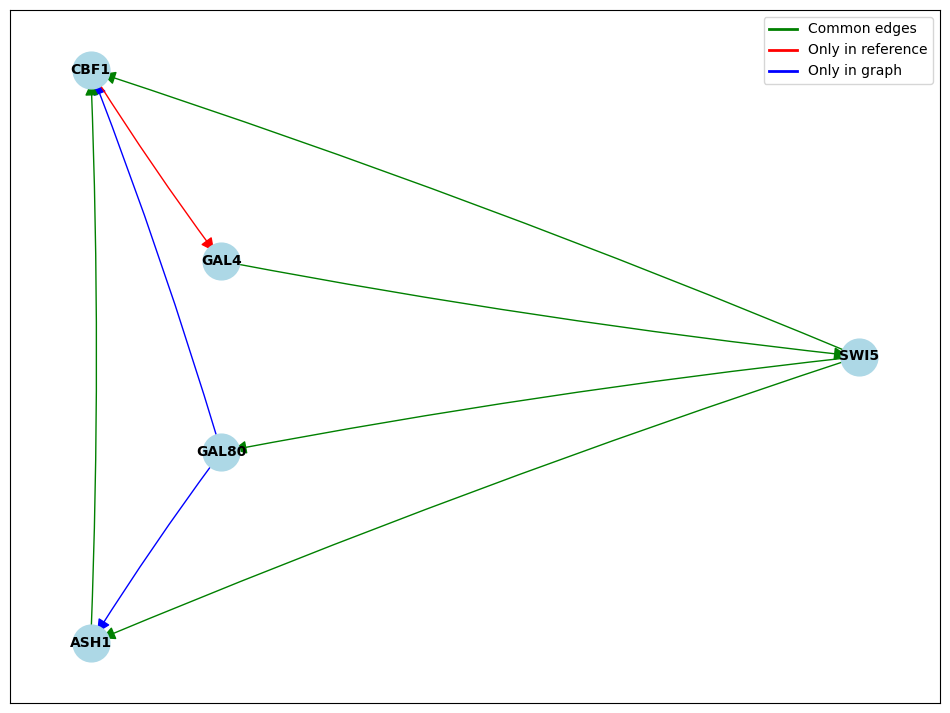

In [57]:
best_model = est.estimate(scoring_method=AICGauss(factors))
net = nx.DiGraph()
net.add_edges_from(best_model.edges())
highlight_edges(net, reference_net)

## Gaussian nets and MSE perfromance

In [27]:
from pgmpy.models import LinearGaussianBayesianNetwork as LGBN
from utils import deloop

### Based on Aracne structure

MSE for SWI5: 0.00011148842355488587
MSE for CBF1: 0.00016067421313945937
MSE for GAL4: 5.051470773275139e-06
MSE for GAL80: 3.595143309626541e-06
MSE for ASH1: 6.008613522127277e-05


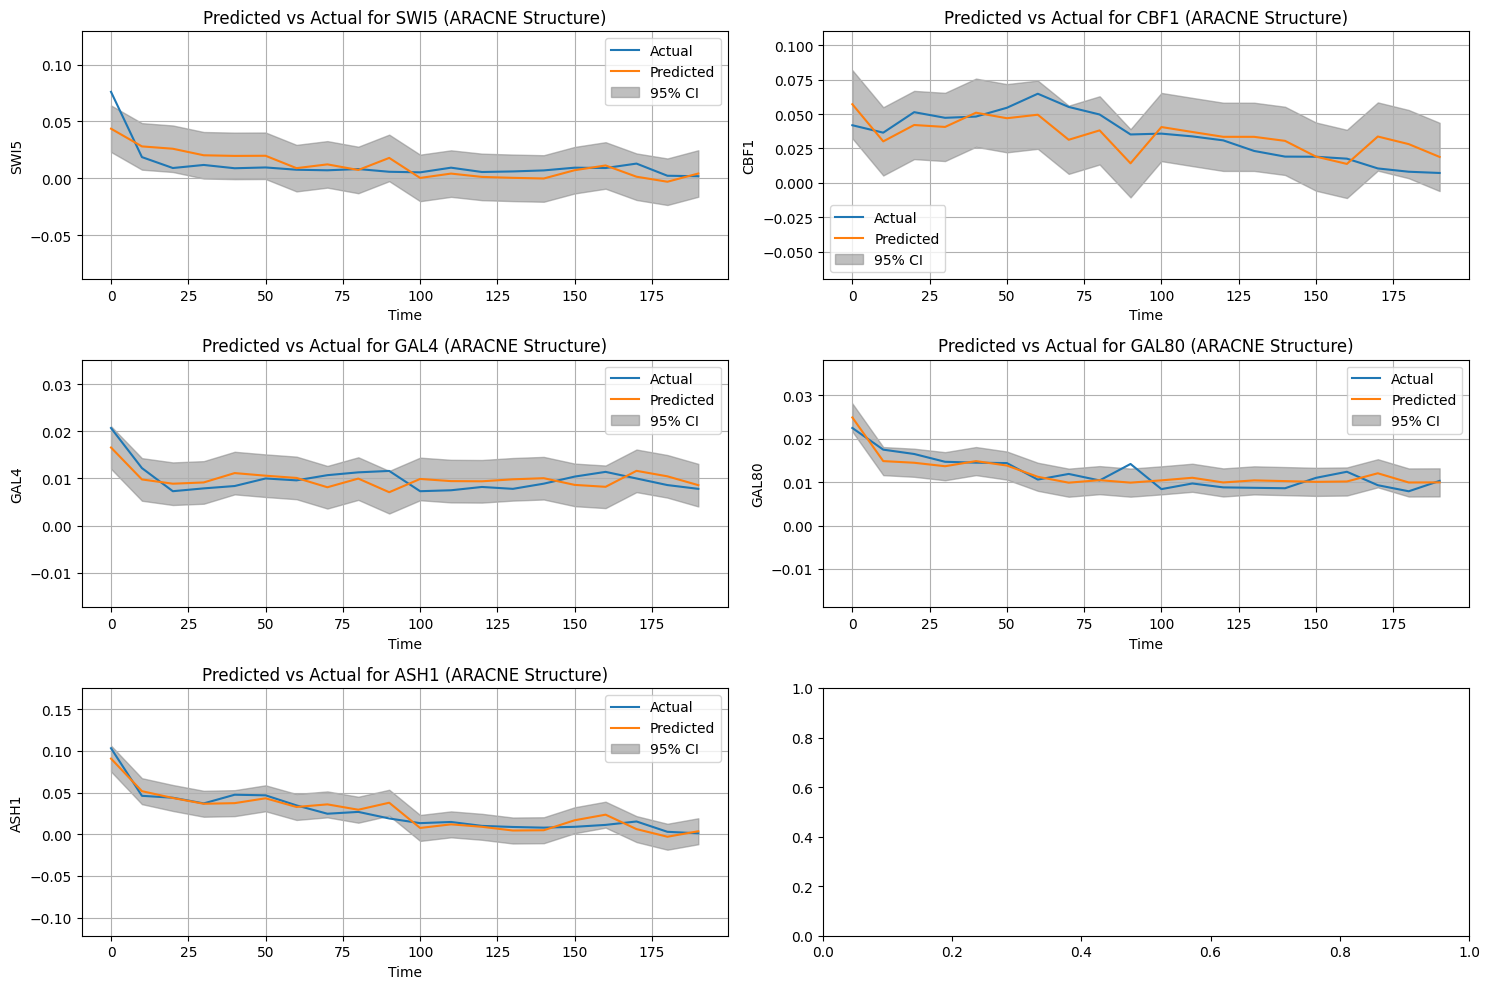

Total MSE: 0.0003408953859985197
True Positives: 	3 
False Negatives: 	3 
False Positives: 	3 
Precision: 		0.50 
Recall: 		0.50 
F1: 		0.50


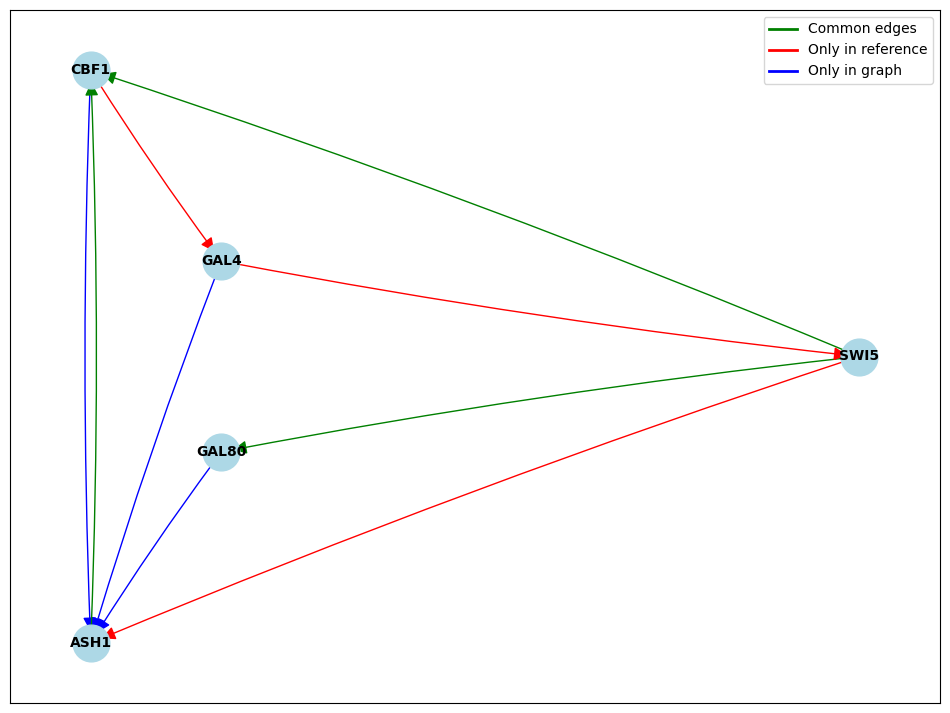

P(SWI5) = N(0.012; 0.0)
P(GAL80 | SWI5) = N(0.178*SWI5 + 0.01; 0.0)
P(CBF1 | SWI5) = N(0.174*SWI5 + 0.033; 0.0)
P(ASH1 | GAL80, CBF1, GAL4) = N(3.636*GAL80 + 0.418*CBF1 + 2.196*GAL4 + -0.054; 0.0)
P(GAL4) = N(0.01; 0.0)
Mean Vector:
 [0.0115   0.00988  0.012115 0.0345   0.026255]
Covariance Matrix:
 [[2.4396e-04 0.0000e+00 4.3450e-05 4.2400e-05 1.7570e-04]
 [0.0000e+00 8.9400e-06 0.0000e+00 0.0000e+00 1.9650e-05]
 [4.3450e-05 0.0000e+00 1.4120e-05 7.5500e-06 5.4490e-05]
 [4.2400e-05 0.0000e+00 7.5500e-06 2.9485e-04 1.5076e-04]
 [1.7570e-04 1.9650e-05 5.4490e-05 1.5076e-04 3.6754e-04]]


In [34]:
model = LGBN(best_aracne_net.edges())
model.fit(factors)
plot_predicted_vs_actual(model, data, factors, title='(ARACNE Structure)')
highlight_edges(best_aracne_net, reference_net)
for cpd in model.get_cpds():
    print(cpd)
mu, cov = model.to_joint_gaussian()
print("Mean Vector:\n", mu)
print("Covariance Matrix:\n", cov)

### Based on the reference structure (-random link(s) to make it a DAG)

MSE for SWI5: 3.998393777349161e-05
MSE for CBF1: 0.0002731219965397464
MSE for GAL4: 1.9071836476517218e-06
MSE for GAL80: 6.058978215084554e-06
MSE for ASH1: 0.00016452899015748985


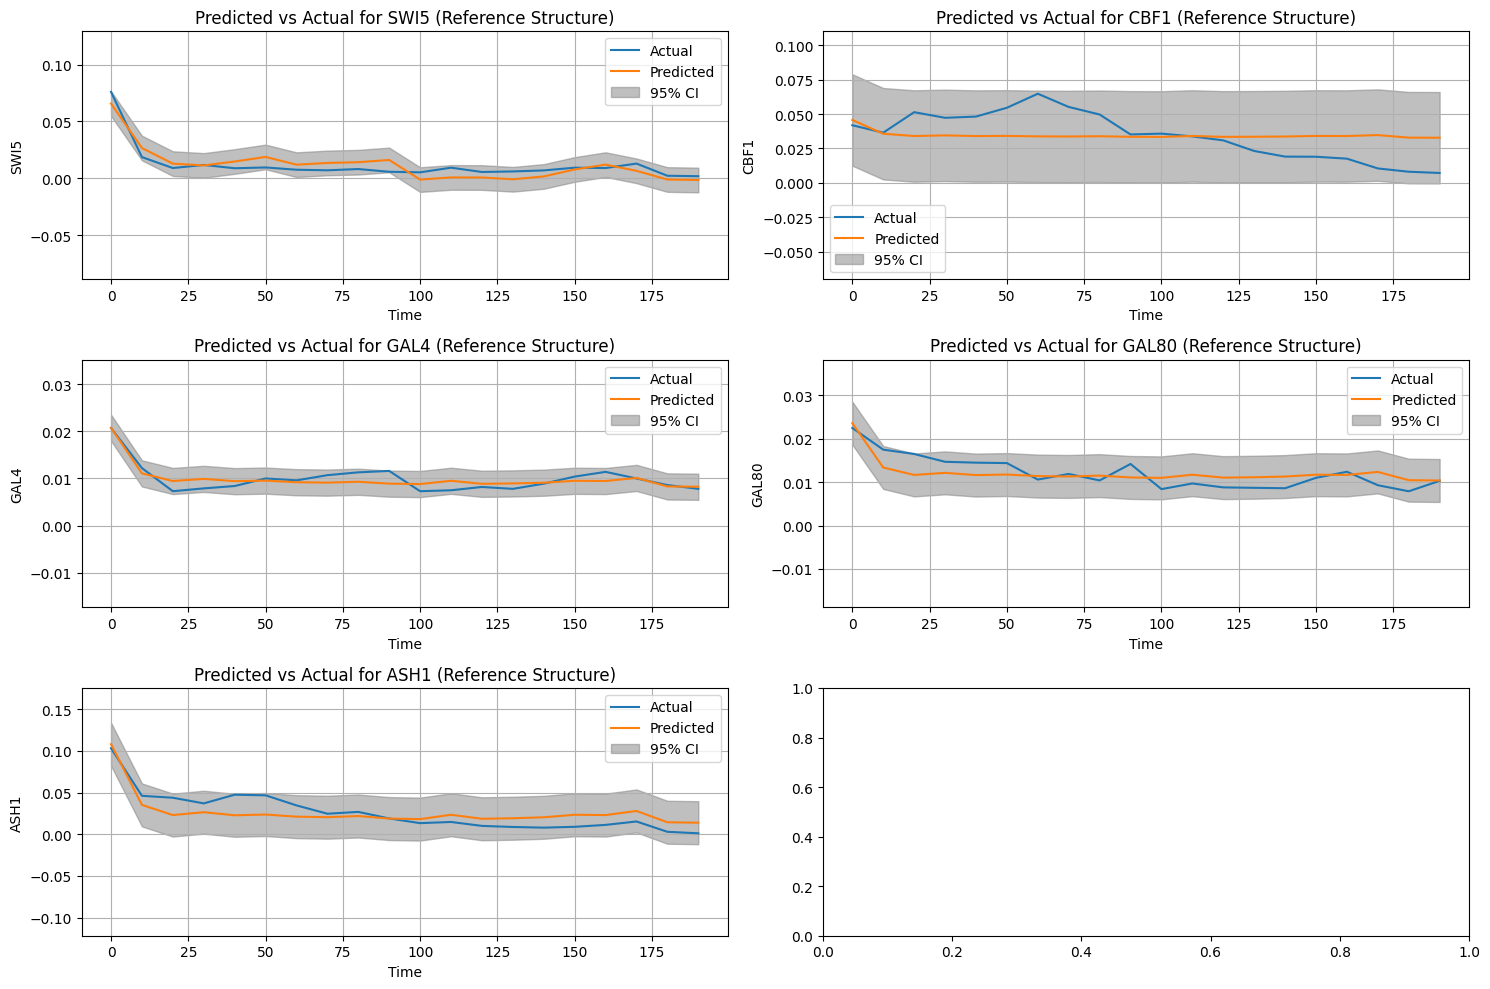

Total MSE: 0.00048560108633346414
True Positives: 	4 
False Negatives: 	2 
False Positives: 	0 
Precision: 		1.00 
Recall: 		0.67 
F1: 		0.80


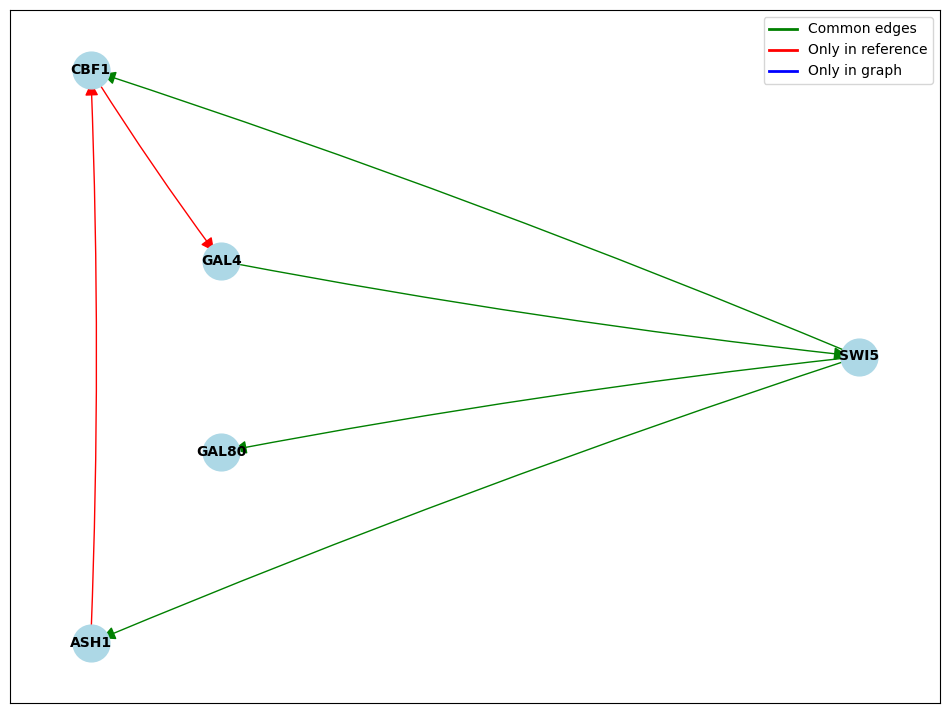

P(GAL4) = N(0.01; 0.0)
P(SWI5 | GAL4) = N(4.599*GAL4 + -0.034; 0.0)
P(ASH1 | SWI5) = N(1.27*SWI5 + 0.012; 0.0)
P(GAL80 | SWI5) = N(0.178*SWI5 + 0.01; 0.0)
P(CBF1 | SWI5) = N(0.174*SWI5 + 0.033; 0.0)
Mean Vector:
 [0.00988  0.0115   0.026255 0.012115 0.0345  ]
Covariance Matrix:
 [[8.9400e-06 4.1140e-05 5.2240e-05 7.3300e-06 7.1500e-06]
 [4.1140e-05 2.4396e-04 3.0980e-04 4.3450e-05 4.2400e-05]
 [5.2240e-05 3.0980e-04 5.6664e-04 5.5180e-05 5.3840e-05]
 [7.3300e-06 4.3450e-05 5.5180e-05 1.4120e-05 7.5500e-06]
 [7.1500e-06 4.2400e-05 5.3840e-05 7.5500e-06 2.9485e-04]]


In [36]:
reference_net_delooped = deloop(reference_net.copy())
model = LGBN(reference_net_delooped.edges())
model.fit(factors)
plot_predicted_vs_actual(model, data, factors, title='(Reference Structure)')
highlight_edges(reference_net_delooped, reference_net)
for cpd in model.get_cpds():
    print(cpd)
mu, cov = model.to_joint_gaussian()
print("Mean Vector:\n", mu)
print("Covariance Matrix:\n", cov)

### Based on the GaussAIC score

MSE for SWI5: 1.5371305965635246e-05
MSE for CBF1: 6.715716315056392e-05
MSE for GAL4: 1.9052966420363901e-06
MSE for GAL80: 2.1987810819292933e-06
MSE for ASH1: 2.30369909497634e-05


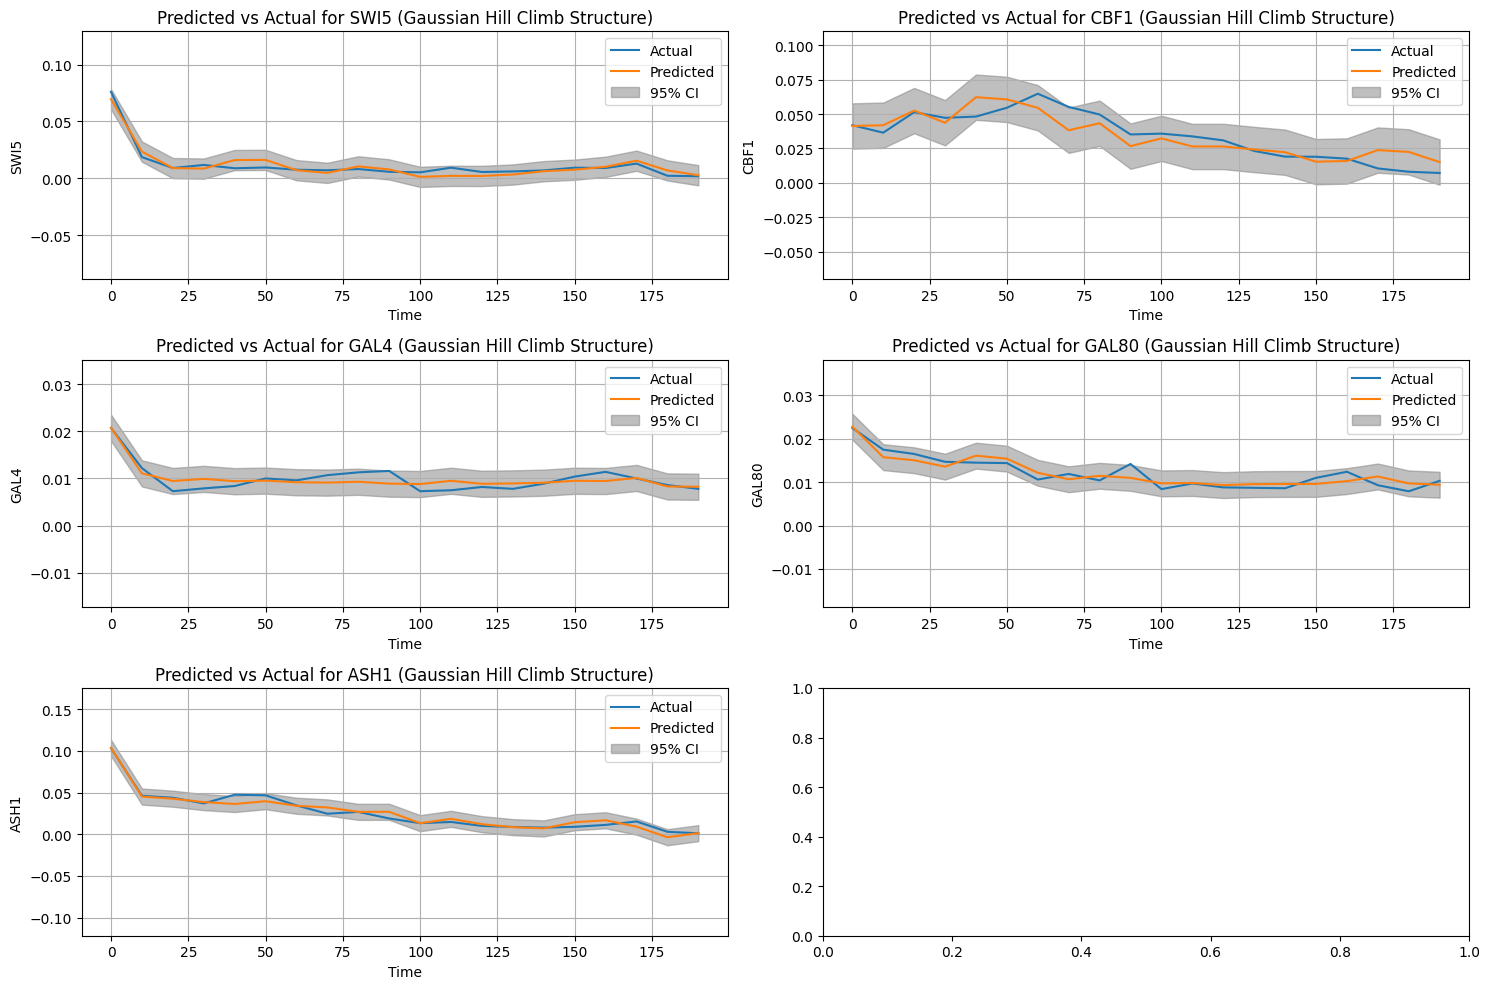

Total MSE: 0.00010966953778992824
True Positives: 	5 
False Negatives: 	1 
False Positives: 	2 
Precision: 		0.71 
Recall: 		0.83 
F1: 		0.77


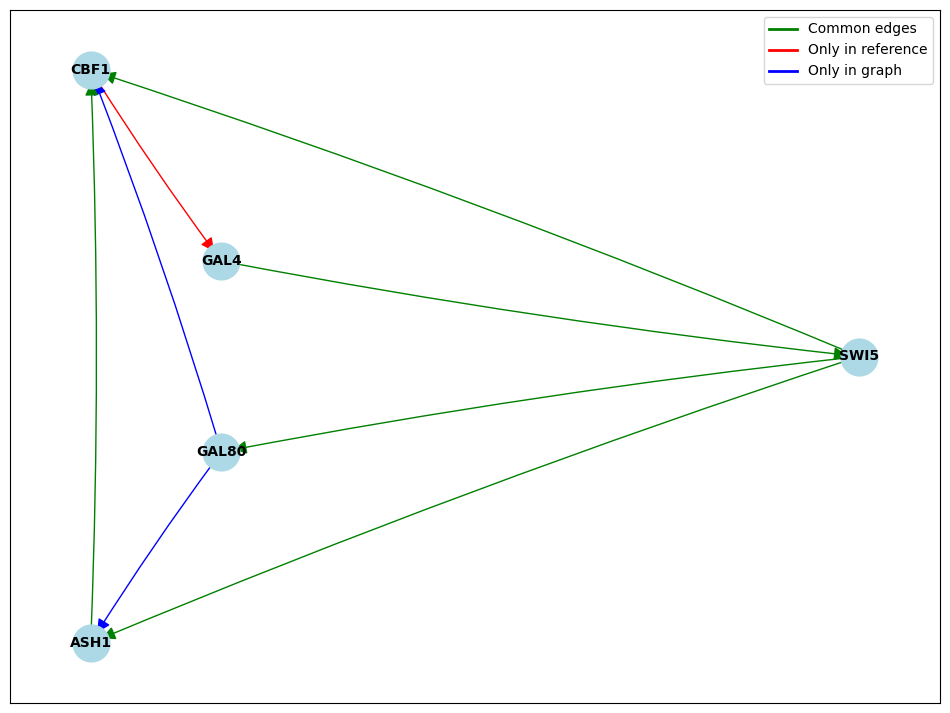

P(SWI5 | GAL4) = N(4.599*GAL4 + -0.034; 0.0)
P(CBF1 | SWI5, GAL80, ASH1) = N(-1.213*SWI5 + -2.229*GAL80 + 1.404*ASH1 + 0.039; 0.0)
P(GAL4) = N(0.01; 0.0)
P(GAL80 | SWI5) = N(0.178*SWI5 + 0.01; 0.0)
P(ASH1 | SWI5, GAL80) = N(0.572*SWI5 + 3.921*GAL80 + -0.028; 0.0)
Mean Vector:
 [0.00988  0.0115   0.012115 0.026255 0.0345  ]
Covariance Matrix:
 [[8.9400e-06 4.1140e-05 7.3300e-06 5.2240e-05 7.1500e-06]
 [4.1140e-05 2.4396e-04 4.3450e-05 3.0980e-04 4.2400e-05]
 [7.3300e-06 4.3450e-05 1.4120e-05 8.0190e-05 2.8460e-05]
 [5.2240e-05 3.0980e-04 8.0190e-05 5.6664e-04 2.4137e-04]
 [7.1500e-06 4.2400e-05 2.8460e-05 2.4137e-04 2.9485e-04]]


In [37]:
model = LGBN(best_model)
model.fit(factors)
plot_predicted_vs_actual(model, data, factors, title='(Gaussian Hill Climb Structure)')
highlight_edges(best_model, reference_net)
for cpd in model.get_cpds():
    print(cpd)
mu, cov = model.to_joint_gaussian()
print("Mean Vector:\n", mu)
print("Covariance Matrix:\n", cov)